In [1]:

!pip install easyocr

     |████████████████████████████████| 62.3 MB 32 kB/s  eta 0:00:014
     |████████████████████████████████| 12.8 MB 45 kB/s  eta 0:00:01    |████████████████████            | 8.0 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 776.8 MB 964 bytes/s a 0:00:01     |█████████▏                      | 222.0 MB 11.6 MB/s eta 0:00:48
     |████████████████████████████████| 50.4 MB 21 kB/s  eta 0:00:012


In [5]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [6]:
IMAGE_PATH = 'Image/7.png'

In [7]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

/home/bekzat/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[66, 15], [433, 15], [433, 108], [66, 108]],
  'Noisy image',
  0.6201711297035217),
 ([[159, 97], [345, 97], [345, 161], [159, 161]],
  'to test',
  0.4291267991065979),
 ([[30, 159], [469, 159], [469, 235], [30, 235]],
  'Tesseract OCR',
  0.39650243520736694)]

In [8]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

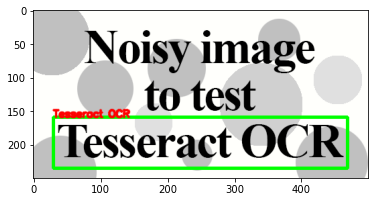

In [15]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,0,0),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

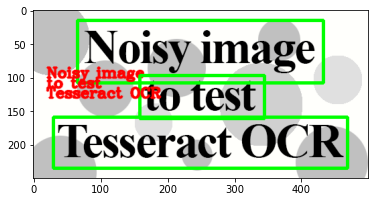

In [20]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.7,(255,0,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

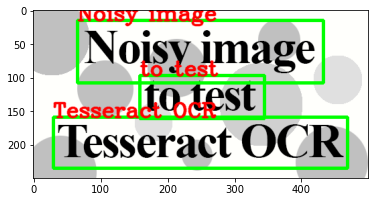

In [19]:
img = cv2.imread(IMAGE_PATH)
for detection in result: 
    top_left = tuple(int(val) for val in detection[0][0])
    bottom_right = tuple(int(val) for val in detection[0][2])
    text = detection[1]
    font = cv2.FONT_HERSHEY_COMPLEX
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,top_left, font, 1,(255,0,0),2,cv2.LINE_AA)
    
plt.imshow(img)
plt.show()